Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3
Completed Simulation # 4
Completed Simulation # 5
Completed Simulation # 6
Completed Simulation # 7
Completed Simulation # 8
Completed Simulation # 9
Completed Simulation # 10
Completed Simulation # 11
Completed Simulation # 12
Completed Simulation # 13
Completed Simulation # 14
Completed Simulation # 15
Completed Simulation # 16
Completed Simulation # 17
Completed Simulation # 18
Completed Simulation # 19
Completed Simulation # 20
Completed Simulation # 21
Completed Simulation # 22
Completed Simulation # 23
Completed Simulation # 24
Completed Simulation # 25
Completed Simulation # 26
Completed Simulation # 27
Completed Simulation # 28
Completed Simulation # 29
Completed Simulation # 30
Completed Simulation # 31
Completed Simulation # 32
Completed Simulation # 33
Completed Simulation # 34
Completed Simulation # 35
Completed Simulation # 36
Completed Simulation # 37
Completed Simulation #

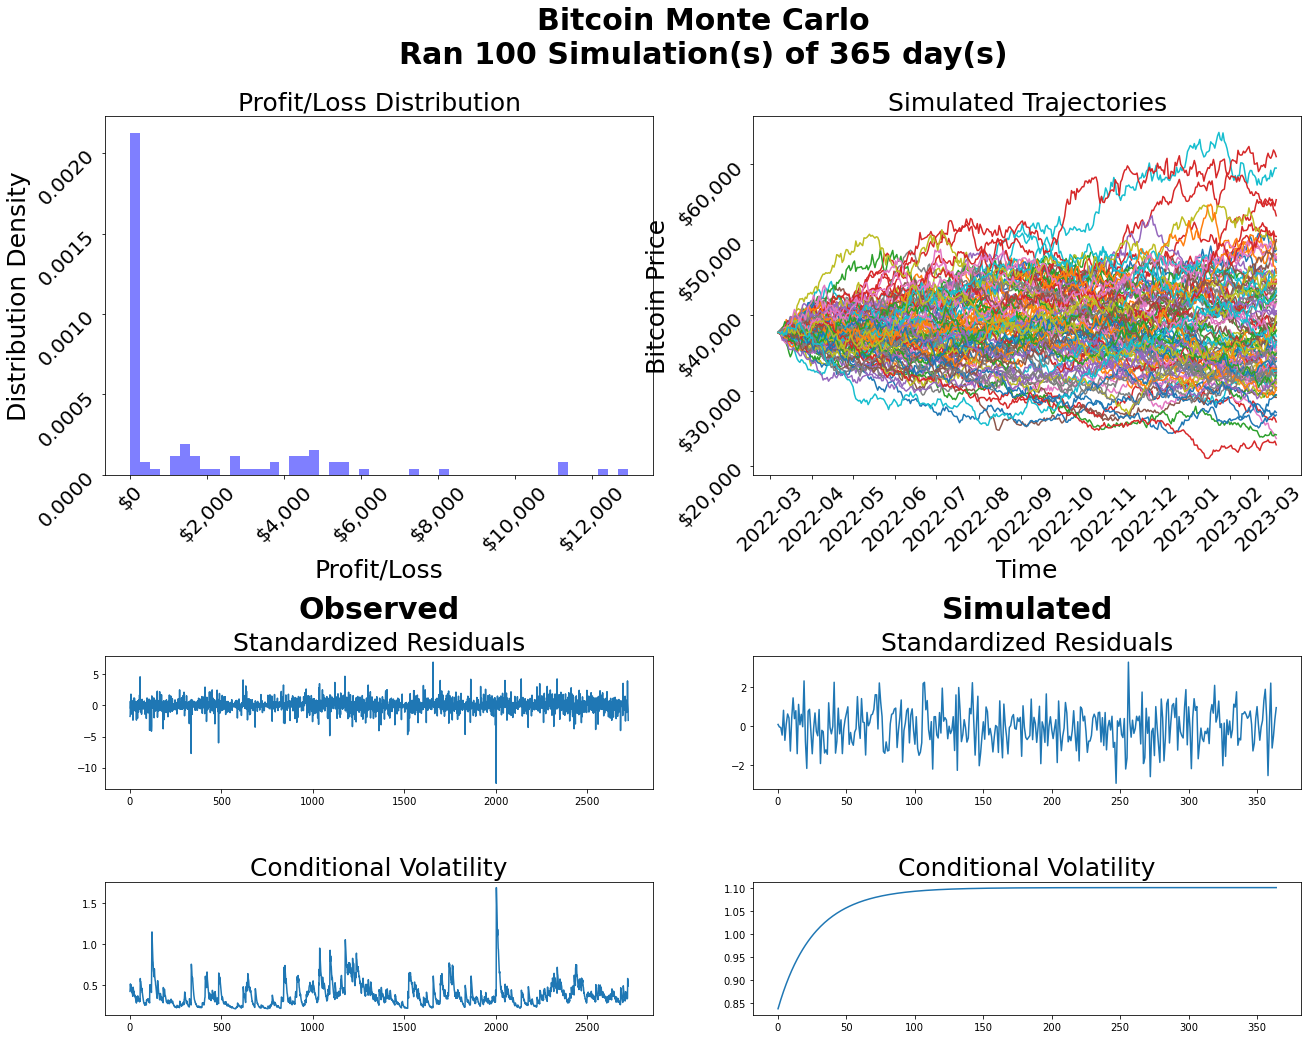

In [9]:
from Bitcoin_MonteCarlo import Timeseries_MonteCarlo
trading_days = 365
horizon = 365
model = 'Options'
simulations = 100
risk_free_rate = .03
ticker = 'BTC-USD'
period = 'max' # Can also have a start/end data,  dict(start='2000-01-01',end='2015-01-01')

# If choosing to evaluate options
options_info = dict(options_type='Asian', strike_price='geometric', call=True, contract_price = 5, interval=4) # Only necessary if model='Options', can be European or Asian.

# This shows some potential in building a relevant series
arch_garch = dict(vol='GARCH', p=1, q=1, o=0, mean="Zero", rescale=True, dist='normal') # These are default values, can be changed
arima = dict(information_criterion='bic') # These are default values, can be changed

TS = Timeseries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.run_simulation(simulations)
TS.simulation_statistics()

Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3
Completed Simulation # 4
Completed Simulation # 5
Completed Simulation # 6
Completed Simulation # 7
Completed Simulation # 8
Completed Simulation # 9
Completed Simulation # 10
Completed Simulation # 11
Completed Simulation # 12
Completed Simulation # 13
Completed Simulation # 14
Completed Simulation # 15
Completed Simulation # 16
Completed Simulation # 17
Completed Simulation # 18
Completed Simulation # 19
Completed Simulation # 20
Completed Simulation # 21
Completed Simulation # 22
Completed Simulation # 23
Completed Simulation # 24
Completed Simulation # 25
Completed Simulation # 26
Completed Simulation # 27
Completed Simulation # 28
Completed Simulation # 29
Completed Simulation # 30
Completed Simulation # 31
Completed Simulation # 32
Completed Simulation # 33
Completed Simulation # 34
Completed Simulation # 35
Completed Simulation # 36
Completed Simulation # 37
Completed Simulation #

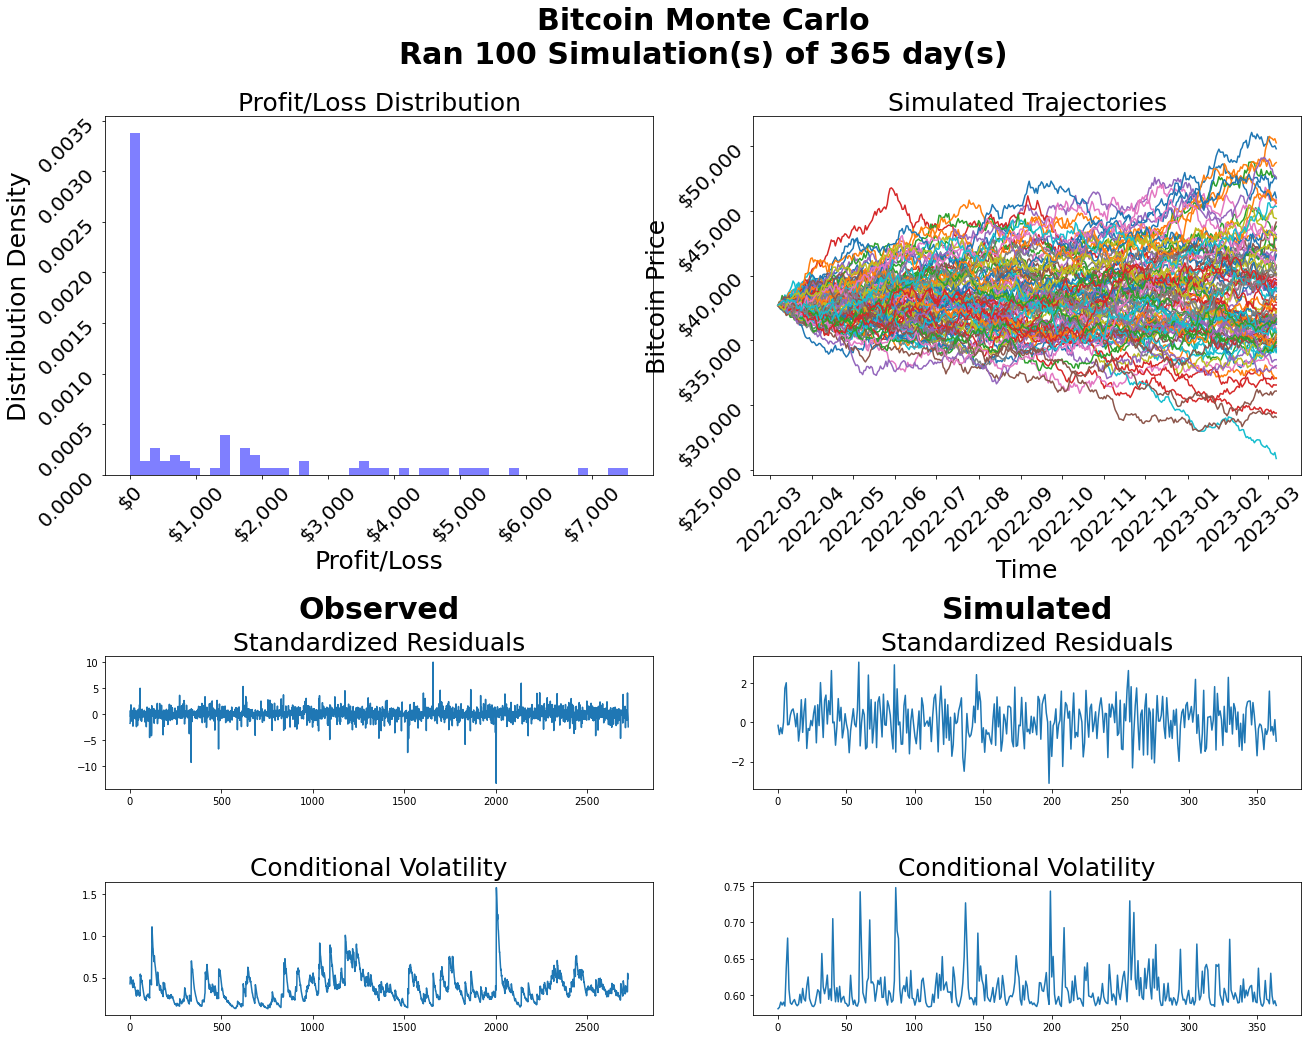

In [10]:
# This shows some promise
arch_garch = dict(vol='GARCH', p=1, q=1,o=0, mean="Zero", rescale=True, dist='t') # These are default values, can be changed
TS = Timeseries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.run_simulation(simulations)
TS.simulation_statistics()

In [ ]:
arch_garch = dict(vol='GARCH', p=1, q=1,o=0, mean="Zero", rescale=True, dist='skewt') # These are default values, can be changed
TS = Timeseries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.run_simulation(simulations)
TS.simulation_statistics()

Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3
Completed Simulation # 4
Completed Simulation # 5
Completed Simulation # 6
Completed Simulation # 7
Completed Simulation # 8
Completed Simulation # 9
Completed Simulation # 10
Completed Simulation # 11
Completed Simulation # 12
Completed Simulation # 13
Completed Simulation # 14
Completed Simulation # 15
Completed Simulation # 16
Completed Simulation # 17
Completed Simulation # 18
Completed Simulation # 19
Completed Simulation # 20
Completed Simulation # 21
Completed Simulation # 22
Completed Simulation # 23
Completed Simulation # 24
Completed Simulation # 25
Completed Simulation # 26
Completed Simulation # 27
Completed Simulation # 28
Completed Simulation # 29
Completed Simulation # 30
Completed Simulation # 31
Completed Simulation # 32
Completed Simulation # 33
Completed Simulation # 34
Completed Simulation # 35
Completed Simulation # 36
Completed Simulation # 37
Completed Simulation #

In [ ]:
arch_garch = dict(vol='GARCH', p=1, q=1, o=0, mean="Constant", rescale=True, dist='normal') # These are default values, can be changed
TS = Timeseries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.run_simulation(simulations)
TS.simulation_statistics()
# sigma^2_t = .0014 + .108 * return_(t-1)^2 + .892 * sigma^2_(t-1)


In [ ]:
arch_garch = dict(vol='GARCH', p=1, q=1,o=0, mean="Constant", rescale=True, dist='t') # These are default values, can be changed
TS = Timeseries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.run_simulation(simulations)
TS.simulation_statistics()

In [ ]:
# This shows some real promise
arch_garch = dict(vol='GARCH', p=1, q=1,o=0, mean="Constant", rescale=True, dist='skewt') # These are default values, can be changed
TS = Timeseries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.run_simulation(simulations)
TS.simulation_statistics()